<a href="https://colab.research.google.com/github/Victorvv1/Curso-de-Analisis-de-Datos-/blob/main/Calculos_con_Arrays_Funciones_Universales_(ufuncs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cálculos con Arrays: Funciones Universales (ufuncs)

El cálculo en matrices NumPy puede ser muy rápido, o puede ser muy lento. La clave para hacerlo rápido es utilizar operaciones vectorizadas, generalmente implementadas a través de las *funciones universales* (ufuncs) de NumPy. Este capítulo motiva la necesidad de las ufuncs de NumPy, que pueden usarse para hacer cálculos repetidos en elementos de matrices mucho más eficientes. Luego introduce muchas de las ufuncs aritméticas más comunes y útiles disponibles en el paquete NumPy.


## La lentitud de los bucles
La implementación predeterminada de Python (conocida como CPython) realiza algunas operaciones muy lentamente. Esto se debe en parte a la naturaleza dinámica e interpretada del lenguaje; los tipos son flexibles, por lo que las secuencias de operaciones no pueden compilarse en código de máquina eficiente como en lenguajes como C y Fortran. Recientemente ha habido varios intentos de abordar esta debilidad: ejemplos conocidos son el proyecto PyPy, una implementación de Python compilada en tiempo de ejecución; el proyecto Cython, que convierte código Python en código C compilable; y el proyecto Numba, que convierte fragmentos de código Python en bytecode LLVM rápido. Cada uno de estos tiene sus fortalezas y debilidades, pero es seguro decir que ninguno de los tres enfoques ha superado aún el alcance y la popularidad del motor estándar CPython.

La relativa lentitud de Python generalmente se manifiesta en situaciones donde se repiten muchas operaciones pequeñas; por ejemplo, recorrer matrices para operar en cada elemento. Por ejemplo, imaginemos que tenemos una matriz de valores y nos gustaría calcular el recíproco de cada uno (el resultado de dividir 1 entre ese número). Un enfoque directo podría verse así:

In [ ]:
import numpy as np
rng = np.random.default_rng(seed=1701)

def compute_reciprocals(values):
  output = np.empty(len(values))
  for i in range(len(values)):
    output[i] = 1.0 / values[i]
  return output

values = rng.integers(1, 10, size=5)
print(values)
print(compute_reciprocals(values))

[9 4 1 3 8]
[0.11111111 0.25       1.         0.33333333 0.125     ]


In [ ]:
big_array = rng.integers(1, 100, size=1_000_000)
%timeit compute_reciprocals(big_array)

1.98 s ± 443 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Toma varios segundos calcular estas millones de operaciones y almacenar el resultado. Cuando incluso los teléfonos móviles tienen velocidades de procesamiento medidas en gigaflops (es decir, miles de millones de operaciones numéricas por segundo), esto parece casi absurdamente lento. Resulta que el cuello de botella aquí no son las operaciones en sí mismas, sino la comprobación de tipos y los envíos de funciones que CPython debe realizar en cada ciclo del bucle. Cada vez que se calcula el recíproco, Python primero examina el tipo del objeto y realiza una búsqueda dinámica de la función correcta para usar con ese tipo. Si estuviéramos trabajando en código compilado, esta especificación de tipo se conocería antes de que el código se ejecutara y el resultado podría calcularse mucho más eficientemente.

## introducción a las Ufuncs
Para muchos tipos de operaciones, NumPy proporciona una interfaz conveniente a este tipo de rutina compilada con tipos estáticos. Esto se conoce como operación vectorizada. Para operaciones simples como la división elemento a elemento aquí, la vectorización es tan simple como usar operadores aritméticos de Python directamente en el objeto matriz. Este enfoque vectorizado está diseñado para llevar el bucle a la capa compilada que subyace a NumPy, lo que conduce a una ejecución mucho más rápida.

Compara los resultados de las siguientes dos operaciones:

In [ ]:
print(compute_reciprocals(values))
print(1.0 / values)

[0.11111111 0.25       1.         0.33333333 0.125     ]
[0.11111111 0.25       1.         0.33333333 0.125     ]


In [ ]:
type(values)

numpy.ndarray

In [ ]:
%timeit (1.0 / big_array)

1.91 ms ± 152 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
np.arange(5) / np.arange(1,6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

In [ ]:
x = np.arange(9).reshape((3, 3))
2 ** x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]])

 Siempre que veamos un bucle en un código de numpy debemos preguntarnos si lo podemos reemplazar por una expresión vectorial

## Explorando las Ufuncs de Numpy

### Aritméticas

In [ ]:
x = np.arange(4)
print(x)
print(x + 5)
print(x - 5)
print(x * 2)
print(x / 2)
print(x // 2)

[0 1 2 3]
[5 6 7 8]
[-5 -4 -3 -2]
[0 2 4 6]
[0.  0.5 1.  1.5]
[0 0 1 1]


In [ ]:
print(-x)
print(x ** 2)
print(x % 2)

[ 0 -1 -2 -3]
[0 1 4 9]
[0 1 0 1]


In [ ]:
-(0.5*x + 1) ** 2

array([-1.  , -2.25, -4.  , -6.25])

Todas estas operaciones son simplres wrappers de funciones específicas

In [ ]:
np.add(x, 2)

array([2, 3, 4, 5])

| Operator    | Equivalent ufunc  | Description                         |
|-------------|-------------------|-------------------------------------|
|`+`          |`np.add`           |Addition (e.g., `1 + 1 = 2`)         |
|`-`          |`np.subtract`      |Subtraction (e.g., `3 - 2 = 1`)      |
|`-`          |`np.negative`      |Unary negation (e.g., `-2`)          |
|`*`          |`np.multiply`      |Multiplication (e.g., `2 * 3 = 6`)   |
|`/`          |`np.divide`        |Division (e.g., `3 / 2 = 1.5`)       |
|`//`         |`np.floor_divide`  |Floor division (e.g., `3 // 2 = 1`)  |
|`**`         |`np.power`         |Exponentiation (e.g., `2 ** 3 = 8`)  |
|`%`          |`np.mod`           |Modulus/remainder (e.g., `9 % 4 = 1`)|

### Valor absoluto

In [ ]:
x = np.array([-1, -2, 0, 1, 2])
abs(x)

array([1, 2, 0, 1, 2])

In [ ]:
np.abs(x)

array([1, 2, 0, 1, 2])

### Funciones trigonométricas

In [ ]:
theta = np.linspace(0, np.pi, 3)
print(theta)

[0.         1.57079633 3.14159265]


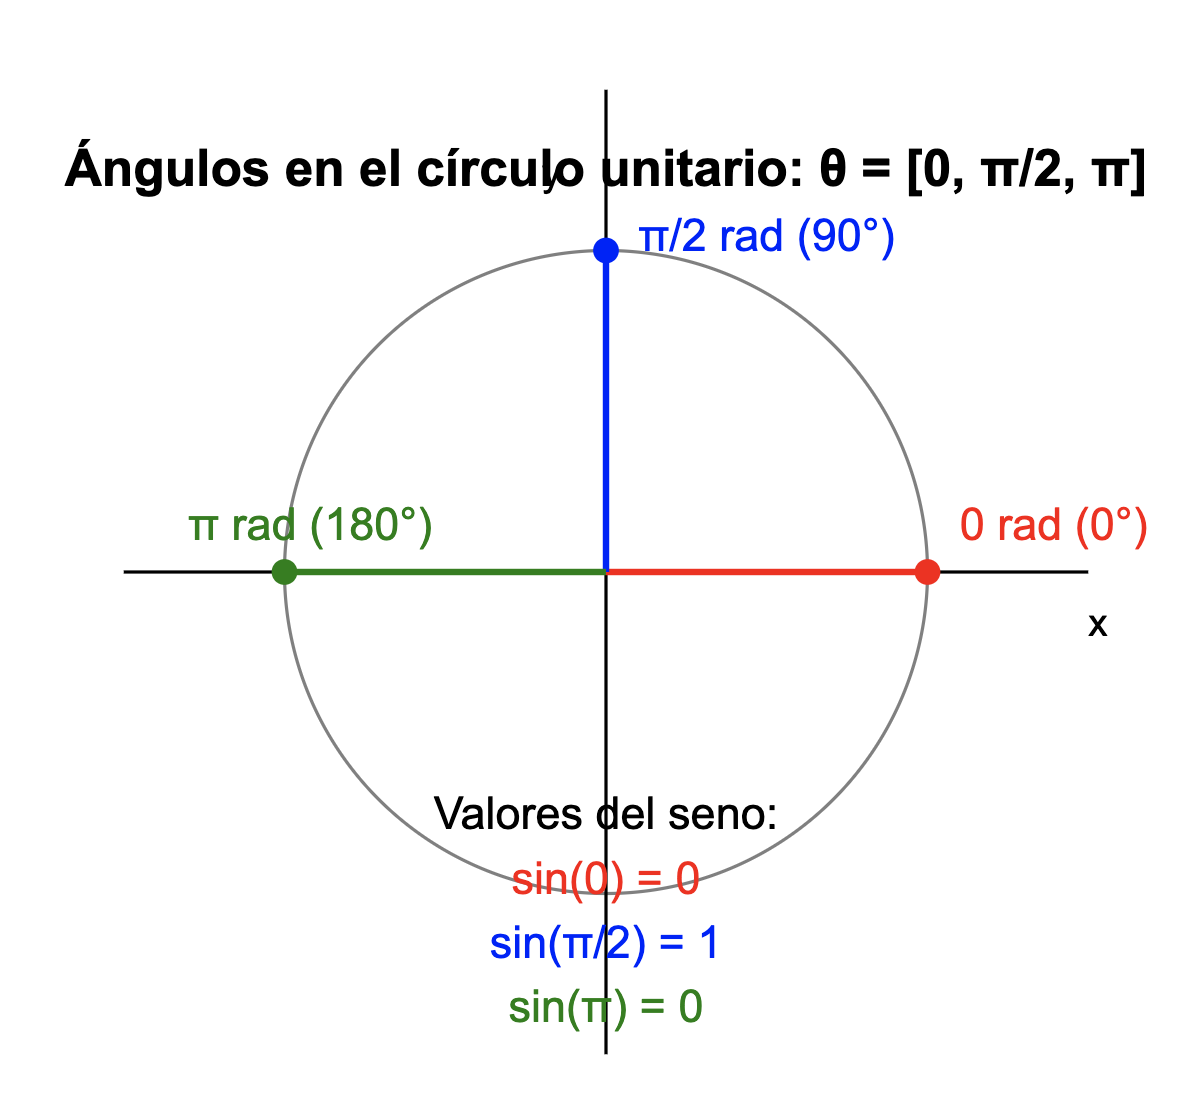

In [ ]:
print(theta)
print(np.sin(theta))
print(np.cos(theta))
print(np.tan(theta))

[0.         1.57079633 3.14159265]
[0.0000000e+00 1.0000000e+00 1.2246468e-16]
[ 1.000000e+00  6.123234e-17 -1.000000e+00]
[ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [ ]:
x = [-1, 0, 1]
print(x)
print(np.arcsin(x))
print(np.arccos(x))
print(np.arctan(x))

[-1, 0, 1]
[-1.57079633  0.          1.57079633]
[3.14159265 1.57079633 0.        ]
[-0.78539816  0.          0.78539816]


### Exponentes y logaritmos

In [ ]:
x = [1, 2, 3]
print("x   =", x)
print("e^x =", np.exp(x))
print("2^x =", np.exp2(x))
print("3^x =", np.power(3., x))

x   = [1, 2, 3]
e^x = [ 2.71828183  7.3890561  20.08553692]
2^x = [2. 4. 8.]
3^x = [ 3.  9. 27.]


In [ ]:
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


In [ ]:
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

exp(x) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) = [0.         0.0009995  0.00995033 0.09531018]


### Agregaciones

In [ ]:
x = np.arange(1, 6)
print(x)

[1 2 3 4 5]


In [ ]:
np.add.reduce(x)

15

In [ ]:
np.multiply.reduce(x)

120

In [ ]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15])

In [ ]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120])

Para ampliar: https://numpy.org/doc/stable/user/basics.ufuncs.html

# Ejercicios de Repaso: Funciones Universales en NumPy

## Ejercicio 1: Operaciones Aritméticas con ufuncs

En este ejercicio practicarás el uso de operaciones aritméticas con ufuncs de NumPy.

```python
import numpy as np

# 1.1 Crea un array unidimensional x con valores del 0 al 9
# Tu código aquí

# 1.2 Aplica las siguientes operaciones aritméticas a x y muestra el resultado:
# - Suma 5 a todos los elementos
# - Resta 2 a todos los elementos
# - Multiplica todos los elementos por 3
# - Divide todos los elementos por 2
# - Calcula el resto de la división por 2 (módulo 2)
# Tu código aquí

# 1.3 Crea un array y con valores del 10 al 19 y suma los arrays x e y
# Tu código aquí

# 1.4 Calcula el valor negativo de x
# Tu código aquí

# 1.5 Eleva los elementos de x al cuadrado utilizando el operador ** y luego utilizando la función np.power
# Tu código aquí

# 1.6 Crea una expresión que combine varias operaciones: (x * 2) + 10 - (x ** 2)
# Tu código aquí
```

## Ejercicio 2: Funciones Matemáticas con ufuncs

En este ejercicio practicarás el uso de funciones matemáticas de NumPy.

```python
import numpy as np

# 2.1 Crea un array x con valores negativos y positivos: [-3, -2, -1, 0, 1, 2, 3]
# Tu código aquí

# 2.2 Calcula el valor absoluto de x usando la función abs() y también np.absolute()
# Tu código aquí

# 2.3 Crea un array de ángulos con valores [0, π/4, π/2, π] y calcula:
# - El seno de cada ángulo
# - El coseno de cada ángulo
# - La tangente de cada ángulo
# Tu código aquí

# 2.4 Usando el array x = [0, 0.5, 1], calcula:
# - El arcoseno de x
# - El arcocoseno de x
# - El arcotangente de x
# Tu código aquí

# 2.5 Crea un array x con valores [1, 2, 3] y calcula:
# - e^x (exponencial)
# - 2^x
# - log(x) (logaritmo natural)
# - log2(x) (logaritmo base 2)
# - log10(x) (logaritmo base 10)
# Tu código aquí
```

## Ejercicio 3: Características Avanzadas de ufuncs

En este ejercicio explorarás características más avanzadas de las ufuncs de NumPy.

```python
import numpy as np

# 3.1 Crea un array x con valores del 1 al 5
# Tu código aquí

# 3.2 Crea un array y vacío de la misma longitud que x y utiliza el parámetro out para
# almacenar directamente el resultado de multiplicar x por 10 en y
# Tu código aquí

# 3.3 Utiliza el array y del ejercicio anterior y almacena el resultado de x elevado al cuadrado
# en las posiciones pares de y
# Tu código aquí

# 3.4 Utiliza el método reduce con la función add para calcular la suma de todos los elementos de x
# Compara el resultado con np.sum(x)
# Tu código aquí

# 3.5 Utiliza el método accumulate con la función add para calcular la suma acumulativa de x
# Compara el resultado con np.cumsum(x)
# Tu código aquí

# 3.6 Utiliza el método outer con la función multiply para crear una tabla de multiplicar
# con los valores de x
# Tu código aquí
```

### soluciones

#### Soluciones Ejercicio 1

In [ ]:
# 1.1 Crea un array unidimensional x con valores del 0 al 9
x = np.arange(10)
print("x =", x)

# 1.2 Aplica las siguientes operaciones aritméticas a x y muestra el resultado:
# - Suma 5 a todos los elementos
print("x + 5 =", x + 5)
# - Resta 2 a todos los elementos
print("x - 2 =", x - 2)
# - Multiplica todos los elementos por 3
print("x * 3 =", x * 3)
# - Divide todos los elementos por 2
print("x / 2 =", x / 2)
# - Calcula el resto de la división por 2 (módulo 2)
print("x % 2 =", x % 2)

# 1.3 Crea un array y con valores del 10 al 19 y suma los arrays x e y
y = np.arange(10, 20)
print("y =", y)
print("x + y =", x + y)

# 1.4 Calcula el valor negativo de x
print("-x =", -x)

# 1.5 Eleva los elementos de x al cuadrado utilizando el operador ** y luego utilizando la función np.power
print("x ** 2 =", x ** 2)
print("np.power(x, 2) =", np.power(x, 2))

# 1.6 Crea una expresión que combine varias operaciones: (x * 2) + 10 - (x ** 2)
resultado = (x * 2) + 10 - (x ** 2)
print("(x * 2) + 10 - (x ** 2) =", resultado)

#### Soluciones Ejercicio 2

In [ ]:
# 2.1 Crea un array x con valores negativos y positivos: [-3, -2, -1, 0, 1, 2, 3]
x = np.array([-3, -2, -1, 0, 1, 2, 3])
print("x =", x)

# 2.2 Calcula el valor absoluto de x usando la función abs() y también np.absolute()
print("abs(x) =", abs(x))
print("np.absolute(x) =", np.absolute(x))
print("np.abs(x) =", np.abs(x))  # np.abs es un alias de np.absolute

# 2.3 Crea un array de ángulos con valores [0, π/4, π/2, π] y calcula:
angulos = np.array([0, np.pi/4, np.pi/2, np.pi])
print("\nÁngulos =", angulos)

# - El seno de cada ángulo
print("sin(ángulos) =", np.sin(angulos))

# - El coseno de cada ángulo
print("cos(ángulos) =", np.cos(angulos))

# - La tangente de cada ángulo
print("tan(ángulos) =", np.tan(angulos))

# 2.4 Usando el array x = [0, 0.5, 1], calcula:
x = np.array([0, 0.5, 1])
print("\nx =", x)

# - El arcoseno de x
print("arcsin(x) =", np.arcsin(x))

# - El arcocoseno de x
print("arccos(x) =", np.arccos(x))

# - El arcotangente de x
print("arctan(x) =", np.arctan(x))

# 2.5 Crea un array x con valores [1, 2, 3] y calcula:
x = np.array([1, 2, 3])
print("\nx =", x)

# - e^x (exponencial)
print("e^x =", np.exp(x))

# - 2^x
print("2^x =", np.exp2(x))

# - log(x) (logaritmo natural)
print("log(x) =", np.log(x))

# - log2(x) (logaritmo base 2)
print("log2(x) =", np.log2(x))

# - log10(x) (logaritmo base 10)
print("log10(x) =", np.log10(x))

#### Soluciones Ejercicio 3

In [ ]:
# 3.1 Crea un array x con valores del 1 al 5
x = np.arange(1, 6)
print("x =", x)


# 3.2 Crea un array y vacío de la misma longitud que x y utiliza el parámetro out para
# almacenar directamente el resultado de multiplicar x por 10 en y
y = np.empty(5)
np.multiply(x, 10, out=y)


# 3.3 Utiliza el método reduce con la función add para calcular la suma de todos los elementos de x
# Compara el resultado con np.sum(x)
suma_reduce = np.add.reduce(x)
suma_np = np.sum(x)
print("Suma con reduce =", suma_reduce)
print("Suma con np.sum =", suma_np)
print("¿Son iguales?", suma_reduce == suma_np)


# 3.4 Utiliza el método accumulate con la función add para calcular la suma acumulativa de x
# Compara el resultado con np.cumsum(x)
suma_acumulada_accumulate = np.add.accumulate(x)
suma_acumulada_np = np.cumsum(x)
print("Suma acumulada con accumulate =", suma_acumulada_accumulate)
print("Suma acumulada con np.cumsum =", suma_acumulada_np)
print("¿Son iguales?", np.array_equal(suma_acumulada_accumulate, suma_acumulada_np))

# 3.5 Utiliza el método outer con la función multiply para crear una tabla de multiplicar
# con los valores de x
tabla_multiplicar = np.multiply.outer(x, x)
print(tabla_multiplicar)

x = [1 2 3 4 5]
Suma con reduce = 15
Suma con np.sum = 15
¿Son iguales? True
Suma acumulada con accumulate = [ 1  3  6 10 15]
Suma acumulada con np.cumsum = [ 1  3  6 10 15]
¿Son iguales? True
[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]


In [ ]:
"""
[[1×1  1×2  1×3  1×4  1×5]
 [2×1  2×2  2×3  2×4  2×5]
 [3×1  3×2  3×3  3×4  3×5]
 [4×1  4×2  4×3  4×4  4×5]
 [5×1  5×2  5×3  5×4  5×5]]

"""

In [ ]:
x = np.array(['a', 'b', 'c'], dtype=object)
np.outer(x, [1, 2, 3])

array([['a', 'aa', 'aaa'],
       ['b', 'bb', 'bbb'],
       ['c', 'cc', 'ccc']], dtype=object)